In [43]:
import pandas as pd
import numpy as np
import os
from statsmodels.tsa.api import Holt
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [30]:
os.getcwd()

'C:\\Users\\ashok.swarna\\OneDrive - Accenture\\cenlar'

In [31]:
def load_file():
    
    df = pd.read_excel('external_regressors_Auto.xlsx')
    df.head()
    df.reset_index(drop=True)
    df = df.set_index('Date')
    df.columns = df.columns.str.replace(' ', '_')
    cols = df.columns
    
    return df, cols

In [32]:
df , cols = load_file()

In [33]:
df.head()

,Forecast_key,Value_for_forecast_key
Date,,
2017-01-01,HPI,184.770
2017-02-01,HPI,185.138
2017-03-01,HPI,186.642
2017-04-01,HPI,188.649
2017-05-01,HPI,190.652


In [45]:
def fit_holt(train):
    
# fit model
    fit1 = Holt(train).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
    linear_pred_te = fit1.forecast(7).rename("Holt's linear trend")
    
    fit2 = Holt(train, exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
    expo_pred_te = fit2.forecast(7).rename("Exponential trend")

    fit3 = Holt(train, damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
    add_pred_te = fit3.forecast(7).rename("Additive damped trend")
    
    linear_pred_tr = fit1.fittedvalues
    expo_pred_tr = fit2.fittedvalues
    add_pred_tr = fit3.fittedvalues

    fit1.fittedvalues.plot(marker="o", color='blue')
    linear_pred_te.plot(color='blue', marker="o", legend=True)
    fit2.fittedvalues.plot(marker="o", color='red')
    expo_pred_te.plot(color='red', marker="o", legend=True)
    fit3.fittedvalues.plot(marker="o", color='green')
    add_pred_te.plot(color='green', marker="o", legend=True)
    train.plot(color='black', marker="o", legend=True)
    plt.show()
    
    return fit1, fit2, fit3, linear_pred_tr, expo_pred_tr, add_pred_tr, linear_pred_te, expo_pred_te, add_pred_te

In [35]:
def mean_absolute_percentage_error(y_true, y_pred): 
    """Calculates MAPE given y_true and y_pred"""
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [36]:
def metrics(y_test, test_pred):
    
    MSE =mean_squared_error(y_true=y_test, y_pred=test_pred)                
    MAE = mean_absolute_error(y_true=y_test, y_pred=test_pred)
    MAPE = mean_absolute_percentage_error(y_test, test_pred)

    return MSE, MAE, MAPE

In [37]:
#Extract the unique codes for filtering the over all data    
forecast_group = df.groupby('Forecast_key', as_index=False)
forecast_list = forecast_group.groups.keys()

In [50]:
def create_data_frame(df1, train, test, linear_pred_tr,tr_linear_mape, expo_pred_tr,tr_expo_mape,add_pred_tr, tr_add_mape ,linear_pred_te,te_linear_mape,expo_pred_te,te_expo_mape,add_pred_te,te_add_mape):
    df3 = pd.DataFrame()
    df3 = pd.concat([df3,df1])
    df3['Date'] = df1.index
    df3['train'] = train
    df3['linear_pred_train'] = linear_pred_tr
    df3['train_Linear_mape'] = tr_linear_mape
    df3['expo_pred_train'] = expo_pred_tr
    df3['train_expo_mape'] = tr_expo_mape
    df3['add_pred_train'] = add_pred_tr  
    df3['train_add_mape'] = tr_add_mape
    df3['test'] = test
    df3['linear_pred_test'] = linear_pred_te
    df3['test_Linear_mape'] = te_linear_mape
    df3['expo_pred_test'] = expo_pred_te
    df3['test_expo_mape'] = te_expo_mape
    df3['add_pred_test'] = add_pred_te
    df3['test_add_mape'] = te_add_mape
    
    return df3
    
       

C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


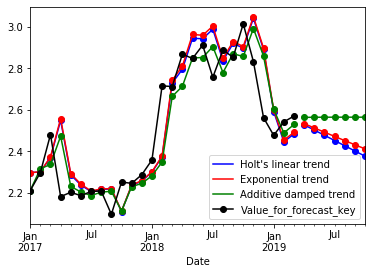

0.3237181922600663 0.5058878706586797 28.747015809411774
0.34937234967815806 0.5260124615649954 29.882774891307314
0.47728904297609287 0.6181057160414498 35.04948596222171


C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


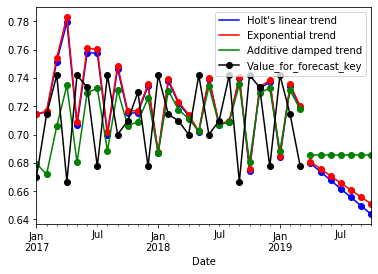

0.004157605239912867 0.05798384666007047 7.934901169763882
0.0036558777573634307 0.05472434450336948 7.49031471203997
0.0018580390626284483 0.0392566727223419 5.380751016593703


C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


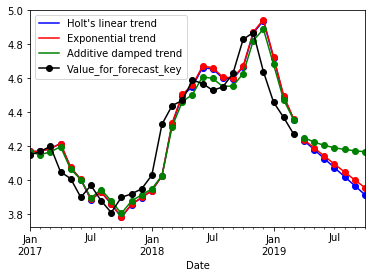

0.08027083703725292 0.26036802665559133 6.975523214106732
0.09390535832029358 0.28237966035697676 7.56792079133984
0.1773274575046819 0.38541415131410256 10.35222956965236


C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


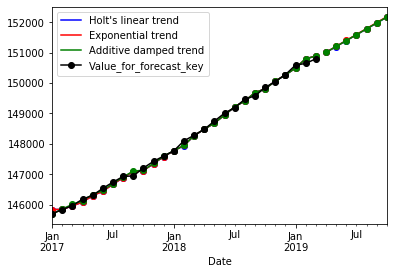

22650.647010514185 137.57406205799947 0.09076927582584907
25360.16622342574 145.00640020912812 0.0956691370396841
22811.380379015365 138.0296425076875 0.09106966914691568


C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


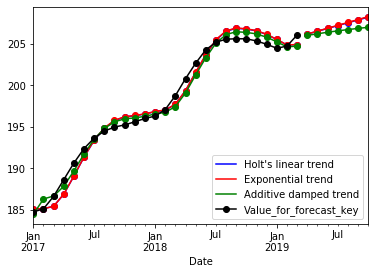

13.66674118916386 3.594307032321134 1.7029133023199619
13.402726902080564 3.5596204057191465 1.6865021984763826
19.255602990814456 4.251101115228104 2.013640617734197


C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


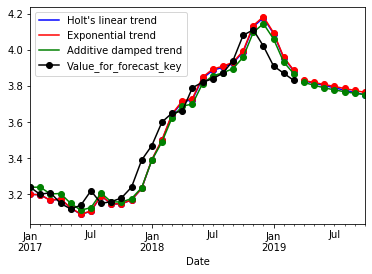

0.09968599299330513 0.29371688784235744 8.542172610611324
0.10481830586349529 0.30113236388492876 8.758187449431034
0.09528917412287109 0.28546361594762454 8.3079034200775


C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


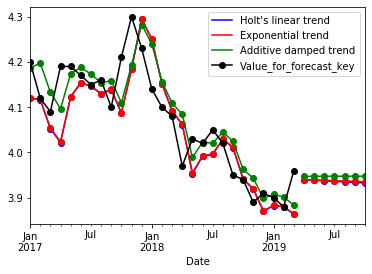

0.0024852022880389145 0.04095862325675892 1.0410069393652985
0.0025841931142969237 0.04217200661977451 1.0722824099358474
0.0030504367560123128 0.04761465463340749 1.2132427736765932


C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


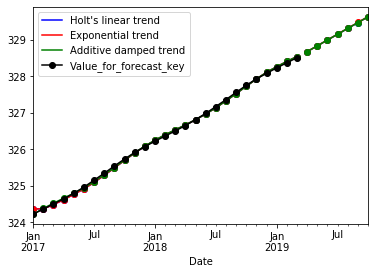

0.003298341986056907 0.043601618410036735 0.013235379517669652
0.003048706760963007 0.04211979329751817 0.012785935676307446
0.00332338685231941 0.043751825406129034 0.013280952333817451


C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


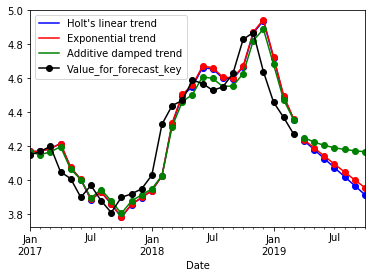

0.08027083703725292 0.26036802665559133 6.975523214106732
0.09390535832029358 0.28237966035697676 7.56792079133984
0.1773274575046819 0.38541415131410256 10.35222956965236


C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
C:\Users\ashok.swarna\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


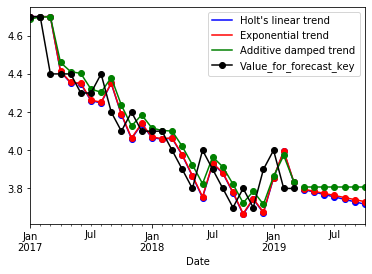

0.02091607513976047 0.12688155244626328 3.5327299750879124
0.02288123153399411 0.13464109014099307 3.7470931069583493
0.0367015955906432 0.17833574068865085 4.954169889786525


,Forecast_key,Value_for_forecast_key,train_expo_mape,Date,train,linear_pred_train,train_Linear_mape,expo_pred_train,add_pred_train,train_add_mape,test,linear_pred_test,test_Linear_mape,expo_pred_test,test_expo_mape,add_pred_test,test_add_mape
0,10_years_Treasury,2.211364,4.409895,2017-01-01,2.211364,2.298000,4.328598,2.298000,2.211768,3.856617,NaN,NaN,28.747016,NaN,29.882775,NaN,35.049486
1,10_years_Treasury,2.298000,4.409895,2017-02-01,2.298000,2.301465,4.328598,2.302036,2.316737,3.856617,NaN,NaN,28.747016,NaN,29.882775,NaN,35.049486
2,10_years_Treasury,2.481739,4.409895,2017-03-01,2.481739,2.370913,4.328598,2.373793,2.337708,3.856617,NaN,NaN,28.747016,NaN,29.882775,NaN,35.049486
3,10_years_Treasury,2.182500,4.409895,2017-04-01,2.182500,2.549526,4.328598,2.558883,2.473676,3.856617,NaN,NaN,28.747016,NaN,29.882775,NaN,35.049486
4,10_years_Treasury,2.203478,4.409895,2017-05-01,2.203478,2.287133,4.328598,2.293120,2.231650,3.856617,NaN,NaN,28.747016,NaN,29.882775,NaN,35.049486
5,10_years_Treasury,2.186818,4.409895,2017-06-01,2.186818,2.238053,4.328598,2.242069,2.204334,3.856617,NaN,NaN,28.747016,NaN,29.882775,NaN,35.049486
6,10_years_Treasury,2.207619,4.409895,2017-07-01,2.207619,2.206711,4.328598,2.209565,2.187656,3.856617,NaN,NaN,28.747016,NaN,29.882775,NaN,35.049486
7,10_years_Treasury,2.209130,4.409895,2017-08-01,2.209130,2.217228,4.328598,2.219447,2.203812,3.856617,NaN,NaN,28.747016,NaN,29.882775,NaN,35.049486
8,10_years_Treasury,2.097143,4.409895,2017-09-01,2.097143,2.219245,4.328598,2.220995,2.208431,3.856617,NaN,NaN,28.747016,NaN,29.882775,NaN,35.049486
9,10_years_Treasury,2.252727,4.409895,2017-10-01,2.252727,2.110522,4.328598,2.112303,2.113269,3.856617,NaN,NaN,28.747016,NaN,29.882775,NaN,35.049486


In [55]:
df2 = pd.DataFrame()
for forecast_item in forecast_list:
    df1 = df[df['Forecast_key'].isin ([forecast_item])]
    df1=df1.sort_index()
    df4 = df1['Value_for_forecast_key']
    df4.head()
    train, test = df4[:27], df4[27:34]
    model_linear, model_expo, model_add, linear_pred_tr, expo_pred_tr, add_pred_tr, linear_pred_te, expo_pred_te, add_pred_te= fit_holt(train)
    tr_linear_mse, tr_linear_mae, tr_linear_mape = metrics(train, linear_pred_tr)
    tr_expo_mse, tr_expo_mae, tr_expo_mape = metrics(train, expo_pred_tr)
    tr_add_mse, tr_add_mae, tr_add_mape = metrics(train, add_pred_tr)
    te_linear_mse, te_linear_mae, te_linear_mape = metrics(test, linear_pred_te)
    te_expo_mse, te_expo_mae, te_expo_mape = metrics(test, expo_pred_te)
    te_add_mse, te_add_mae, te_add_mape = metrics(test, add_pred_te)
    print(te_linear_mse, te_linear_mae, te_linear_mape)
    print(te_expo_mse, te_expo_mae, te_expo_mape)
    print(te_add_mse, te_add_mae, te_add_mape)
    df3 = create_data_frame(df1, train, test, linear_pred_tr,tr_linear_mape, expo_pred_tr,tr_expo_mape,add_pred_tr, tr_add_mape ,linear_pred_te,te_linear_mape,expo_pred_te,te_expo_mape,add_pred_te,te_add_mape)
    df2 = pd.concat([df2,df3], ignore_index = True)

df2

In [52]:
df2.to_csv('holt_forecasting.Csv', index=False) 